In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [3]:
labels = ['class','age', 'menopause','tumor-size','inv-nodes', 'node-caps','deg-malig','breast','breast-quad','irradiat']
target_label='class'
cat_feature_labels=labels.copy()
cat_feature_labels.remove(target_label)
print("\nLabels: ",labels)
print("\nFeature Labels: ",cat_feature_labels)
print("\nTarget Label : ", target_label)



Labels:  ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

Feature Labels:  ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

Target Label :  class


In [4]:
df = pd.read_csv('breast-cancer.data', names=labels)
df.head().T

,0,1,2,3,4
class,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events
age,30-39,40-49,40-49,60-69,40-49
menopause,premeno,premeno,premeno,ge40,premeno
tumor-size,30-34,20-24,20-24,15-19,0-4
inv-nodes,0-2,0-2,0-2,0-2,0-2
node-caps,no,no,no,no,no
deg-malig,3,2,2,2,2
breast,left,right,left,right,right
breast-quad,left_low,right_up,left_low,left_up,right_low
irradiat,no,no,no,no,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
class          286 non-null object
age            286 non-null object
menopause      286 non-null object
tumor-size     286 non-null object
inv-nodes      286 non-null object
node-caps      286 non-null object
deg-malig      286 non-null int64
breast         286 non-null object
breast-quad    286 non-null object
irradiat       286 non-null object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [6]:
df['deg-malig'].value_counts()

2    130
3     85
1     71
Name: deg-malig, dtype: int64

In [7]:
df['deg-malig'].astype('category')

0      3
1      2
2      2
3      2
4      2
      ..
281    2
282    3
283    1
284    3
285    3
Name: deg-malig, Length: 286, dtype: category
Categories (3, int64): [1, 2, 3]

In [8]:
[col for col in df.columns] 

['class',
 'age',
 'menopause',
 'tumor-size',
 'inv-nodes',
 'node-caps',
 'deg-malig',
 'breast',
 'breast-quad',
 'irradiat']

In [9]:
df.shape[1]


10

In [12]:
# LabelEncoder
for col in labels:
    df[col+"_encoded"]= LabelEncoder().fit_transform(df[col])

print(df.shape)
df.head(3)



(286, 20)


,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class_encoded,age_encoded,menopause_encoded,tumor-size_encoded,inv-nodes_encoded,node-caps_encoded,deg-malig_encoded,breast_encoded,breast-quad_encoded,irradiat_encoded
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no,0,1,2,5,0,1,2,0,2,0
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no,0,2,2,3,0,1,1,1,5,0
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no,0,2,2,3,0,1,1,0,2,0


In [18]:
encoded_feature_labels = [col for col in df.columns  if '_encoded' in col]    
print(df[encoded_feature_labels].shape)
df[encoded_feature_labels].head()

(286, 10)


,class_encoded,age_encoded,menopause_encoded,tumor-size_encoded,inv-nodes_encoded,node-caps_encoded,deg-malig_encoded,breast_encoded,breast-quad_encoded,irradiat_encoded
0,0,1,2,5,0,1,2,0,2,0
1,0,2,2,3,0,1,1,1,5,0
2,0,2,2,3,0,1,1,0,2,0
3,0,4,0,2,0,1,1,1,3,0
4,0,2,2,0,0,1,1,1,4,0


In [170]:
[col for col in encoded_feature_labels]

['class_encoded',
 'age_encoded',
 'menopause_encoded',
 'tumor-size_encoded',
 'inv-nodes_encoded',
 'node-caps_encoded',
 'deg-malig_encoded',
 'breast_encoded',
 'breast-quad_encoded',
 'irradiat_encoded']

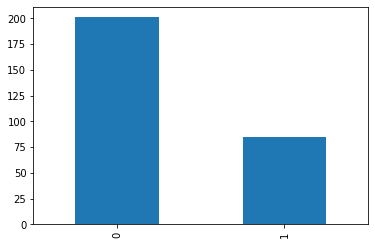

In [28]:
#Modelling with LabelEncoder
X = df[encoded_feature_labels[1:]]
y = df[encoded_feature_labels[0]]
y.value_counts().plot(kind='bar')
plt.show()


In [40]:
# ,stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)
X_train.shape, X_test.shape

((191, 9), (95, 9))

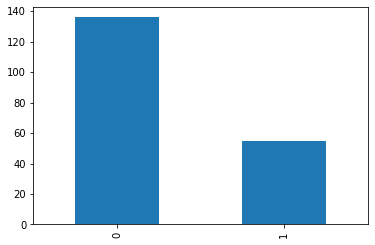

In [41]:
y_train.value_counts().plot(kind='bar')

In [46]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
print(xgb_model)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : {}".format(accuracy))

[23:47:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)
Accuracy : 0.631578947368421


In [51]:
#OneHotEncoder
# for col in encoded_feature_labels:
#     df[col+"_ohe_encoded"]  = OneHotEncoder(sparse=False).fit_transform(df[col]).toarray()
    
# df.shape
ohe = OneHotEncoder()
X_ohe_encoded= ohe.fit_transform(df[encoded_feature_labels[1:]]).toarray()

C:\Users\X168586\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [52]:
X_ohe_encoded.shape

(286, 43)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe_encoded, y, test_size =0.33, random_state=7)
X_train.shape, X_test.shape

((191, 43), (95, 43))

In [54]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
print(xgb_model)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : {}".format(accuracy))

[23:52:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)
Accuracy : 0.6736842105263158


C:\Users\X168586\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
